# sine Wave

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = InteractiveSession(config=config)

In [3]:
x = np.linspace(0, 200, 2000)
x

array([0.00000000e+00, 1.00050025e-01, 2.00100050e-01, ...,
       1.99799900e+02, 1.99899950e+02, 2.00000000e+02])

In [4]:
y = np.sin(x)
y

array([ 0.        ,  0.09988319,  0.19876739, ..., -0.95270915,
       -0.91759195, -0.8732973 ])

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data=y, index=x, columns=['sin wave'])
df

,sin wave
0.00000,0.000000
0.10005,0.099883
0.20010,0.198767
0.30015,0.295664
0.40020,0.389603
...,...
199.59980,-0.994102
199.69985,-0.978298
199.79990,-0.952709
199.89995,-0.917592


<AxesSubplot:>

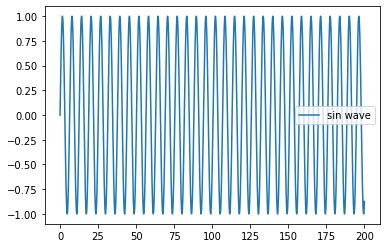

In [7]:
df.plot()

In [8]:
train = df.iloc[:1600]
test = df.iloc[1600:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
# DataFrame의 data를정규분포 형태(0과 1사이)로 데이터 가공

In [10]:
scaler1 = MinMaxScaler()
scaler1.fit(train)
s_train = scaler1.transform(train)

In [11]:
scaler2 = MinMaxScaler()
scaler2.fit(test)
s_test = scaler2.transform(test)

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# 데이터를 시계열 데이터로 바꿔줌

In [13]:
g_train = TimeseriesGenerator(s_train, s_train, 10, batch_size=1)
g_test = TimeseriesGenerator(s_test, s_test, 2, batch_size=1)

In [14]:
model = keras.Sequential()

In [15]:
data_features = 1
model.add(keras.layers.LSTM(50, input_shape=(10, data_features)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(g_train, epochs=10)

Epoch 1/10
1590/1590 [==============================] - 3s 2ms/step - loss: 0.0184
Epoch 2/10
1590/1590 [==============================] - 3s 2ms/step - loss: 0.0025
Epoch 3/10
1590/1590 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 4/10
1590/1590 [==============================] - 3s 2ms/step - loss: 8.3242e-04
Epoch 5/10
1590/1590 [==============================] - 3s 2ms/step - loss: 6.3726e-04
Epoch 6/10
1590/1590 [==============================] - 3s 2ms/step - loss: 5.1437e-04
Epoch 7/10
1590/1590 [==============================] - 3s 2ms/step - loss: 3.2218e-04
Epoch 8/10
1590/1590 [==============================] - 3s 2ms/step - loss: 2.1411e-04
Epoch 9/10
1590/1590 [==============================] - 3s 2ms/step - loss: 1.9845e-04
Epoch 10/10
1590/1590 [==============================] - 3s 2ms/step - loss: 1.4136e-04


In [19]:
loss1 = pd.DataFrame(model.history.history)
loss1

,loss
0,0.018371
1,0.002475
2,0.001360
3,0.000832
4,0.000637
5,0.000514
6,0.000322
7,0.000214
8,0.000198
9,0.000141


<AxesSubplot:>

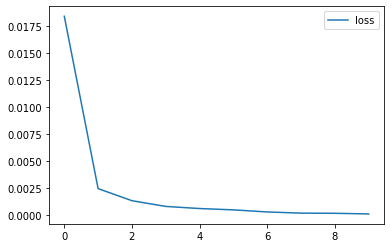

In [20]:
loss1.plot()

In [21]:
g_predict = model.predict(g_test)
g_predict

array([[0.6813726 ],
       [0.6355657 ],
       [0.5878019 ],
       [0.5394052 ],
       [0.49173957],
       [0.44606504],
       [0.4034235 ],
       [0.36457372],
       [0.3299786 ],
       [0.29983473],
       [0.27412894],
       [0.25270402],
       [0.23532179],
       [0.22171609],
       [0.21163325],
       [0.20486015],
       [0.20124291],
       [0.20069793],
       [0.20321693],
       [0.20886828],
       [0.21779363],
       [0.23019935],
       [0.24634084],
       [0.266497  ],
       [0.29093215],
       [0.31984442],
       [0.35330155],
       [0.39117077],
       [0.43305513],
       [0.47825384],
       [0.5257646 ],
       [0.5743411 ],
       [0.6226039 ],
       [0.66918606],
       [0.71288234],
       [0.75276715],
       [0.788257  ],
       [0.8191122 ],
       [0.84538865],
       [0.86736023],
       [0.88543504],
       [0.9000799 ],
       [0.91176367],
       [0.9209184 ],
       [0.9279176 ],
       [0.93306625],
       [0.9365985 ],
       [0.938

In [22]:
df_test = pd.DataFrame(index=x[1600:], data=s_test, columns=['sine wave test'])
df_test

,sine wave test
160.08004,0.570361
160.18009,0.520563
160.28014,0.470559
160.38019,0.420849
160.48024,0.371931
...,...
199.59980,0.002931
199.69985,0.010833
199.79990,0.023628
199.89995,0.041187


In [23]:
print(len(g_predict))
print(len(df_test))

398
400


In [24]:
df_test.index

Float64Index([   160.08004002001,  160.1800900450225,   160.280140070035,
               160.3801900950475, 160.48024012006002, 160.58029014507252,
              160.68034017008503, 160.78039019509754, 160.88044022011005,
              160.98049024512255,
              ...
              199.09954977488744, 199.19959979989994, 199.29964982491245,
              199.39969984992496, 199.49974987493746, 199.59979989994997,
              199.69984992496248, 199.79989994997499,  199.8999499749875,
                           200.0],
             dtype='float64', length=400)

In [25]:
df_test.drop(axis=0, index=[160.08004002001, 200.0], inplace=True)

In [26]:
df_test['sine wave predict'] = g_predict

In [27]:
df_test.head(3)

,sine wave test,sine wave predict
160.18009,0.520563,0.681373
160.28014,0.470559,0.635566
160.38019,0.420849,0.587802


<AxesSubplot:>

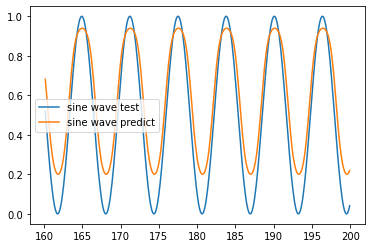

In [29]:
df_test.plot()